<a href="https://colab.research.google.com/github/manish123ongithub/final_projects/blob/main/Copy_of_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# loading the data
df = pd.read_csv("/content/cars_price.csv")

In [ ]:
# viewing data of csv file
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.shape

(205, 26)

In [ ]:
df.duplicated().sum()

0

'0' means there are no duplicated values

In [ ]:
# checking null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In the given dataset, instead of having explicit null values, there are "?" marks present in the dataset. Before proceeding with any further analysis or modeling, it is neccesary to convert these "?" marks to appropriate null values. For this purpose, we will use NumPy library to replace "?" with np.nan.

By replacing "?" with np.nan, we can accurately represent missing or unknown values in the dataset. This step enables us to handle missing values appropriately during the preprocessing phase.

In [ ]:
## Replace '?' with NaN in all the  columns in the dataframe
df.replace('?', np.nan, inplace=True)

#check for null values after replacing "?" symbol
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Hence we have successfully replaced '?' with NaN

Now we will check the unique values for each columns

In [ ]:
#check for count of each unique value
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

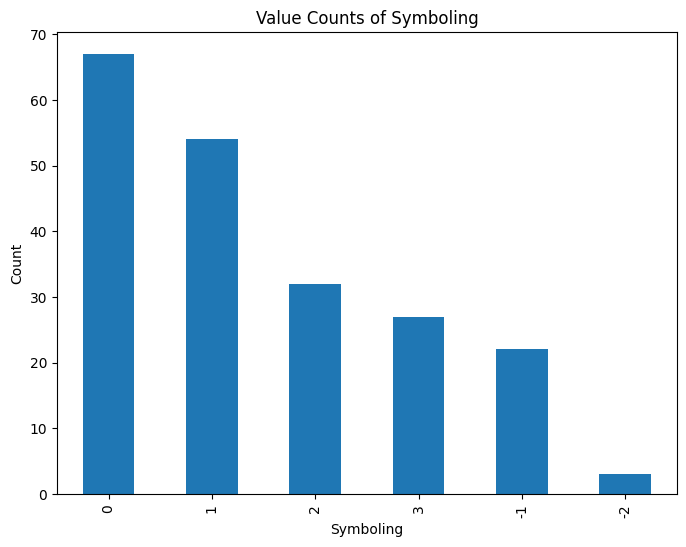

In [ ]:
# Plot the value counts of "symboling"
plt.figure(figsize=(8, 6))
df["symboling"].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Symboling")
plt.ylabel("Count")
plt.title("Value Counts of Symboling")
plt.show()

In [ ]:
df["normalized-losses"].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized-losses, dtype: int64

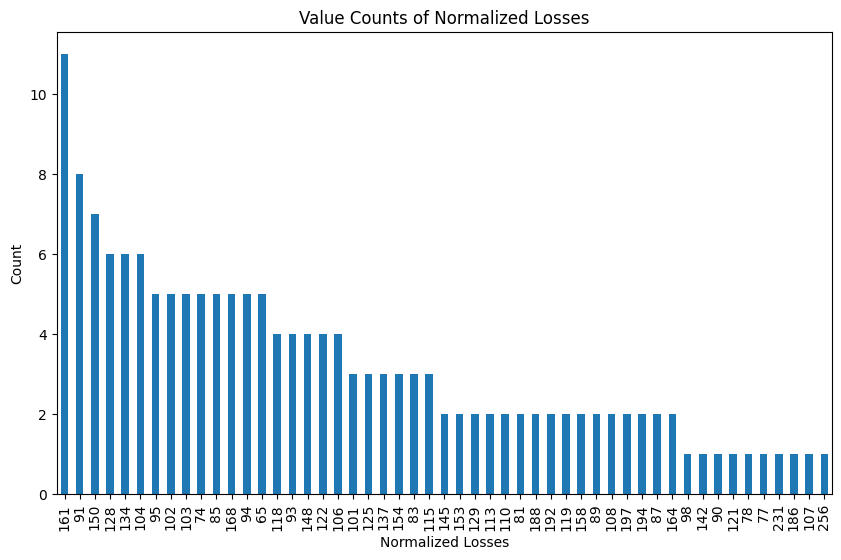

In [ ]:
# Plot the value counts of "normalized-losses"
plt.figure(figsize=(10, 6))
df["normalized-losses"].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Normalized Losses")
plt.ylabel("Count")
plt.title("Value Counts of Normalized Losses")
plt.show()

In [ ]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

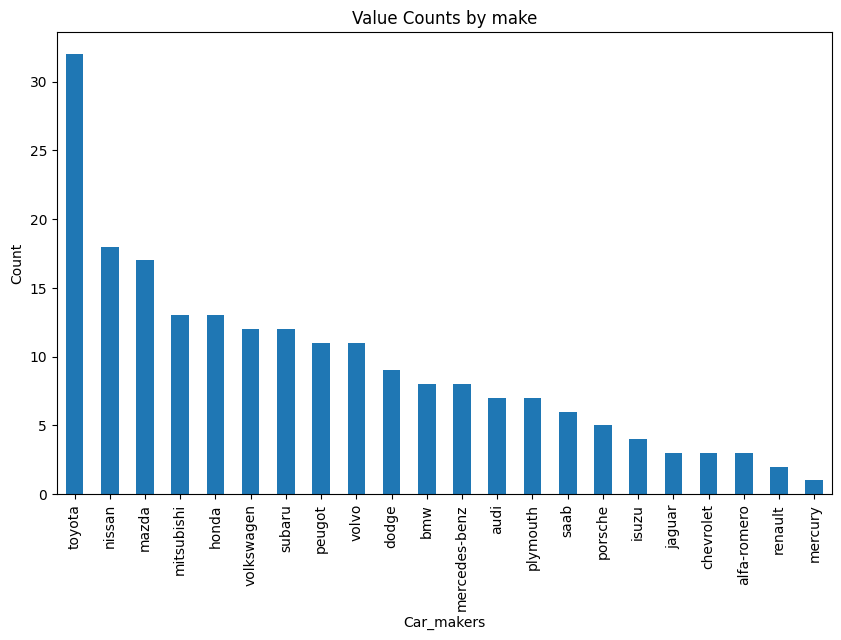

In [ ]:
plt.figure(figsize = (10, 6))
df['make'].value_counts().sort_values(ascending = False).plot(kind='bar')
plt.xlabel('Car_makers')
plt.ylabel('Count')
plt.title('Value Counts by make')
plt.show()

In [ ]:
df["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

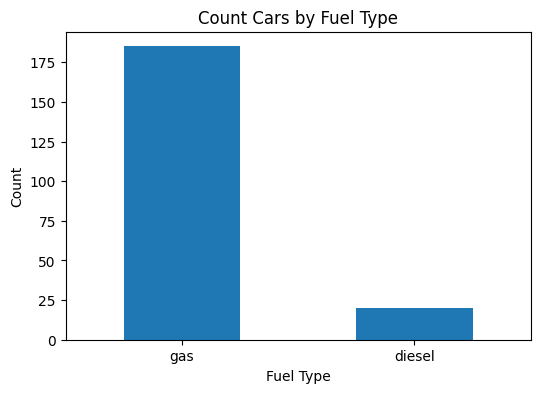

In [ ]:
fuel_type_counts = df["fuel-type"].value_counts()

plt.figure(figsize=(6, 4))
fuel_type_counts.plot(kind='bar')
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Count Cars by Fuel Type")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

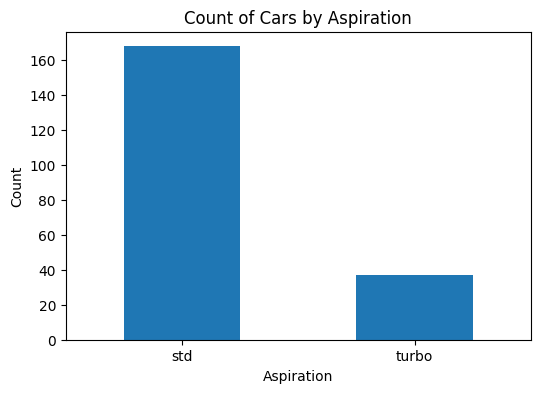

In [ ]:
aspiration_counts = df["aspiration"].value_counts()

plt.figure(figsize=(6, 4))
aspiration_counts.plot(kind='bar')
plt.xlabel("Aspiration")
plt.ylabel("Count")
plt.title("Count of Cars by Aspiration")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

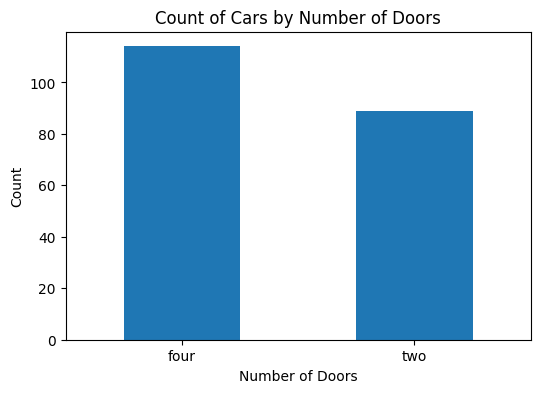

In [ ]:
num_of_doors_counts = df["num-of-doors"].value_counts()

plt.figure(figsize=(6, 4))
num_of_doors_counts.plot(kind='bar')
plt.xlabel("Number of Doors")
plt.ylabel("Count")
plt.title("Count of Cars by Number of Doors")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

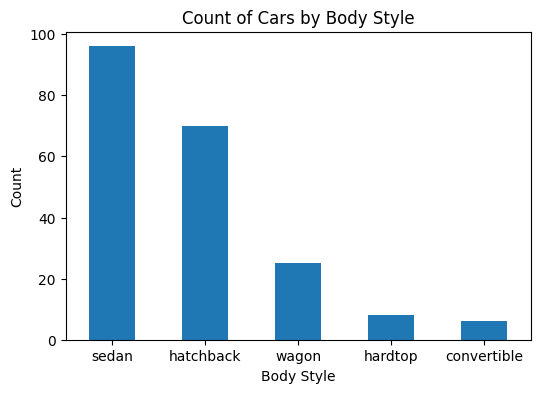

In [ ]:
body_style_counts = df["body-style"].value_counts()

plt.figure(figsize=(6, 4))
body_style_counts.plot(kind='bar')
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.title("Count of Cars by Body Style")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

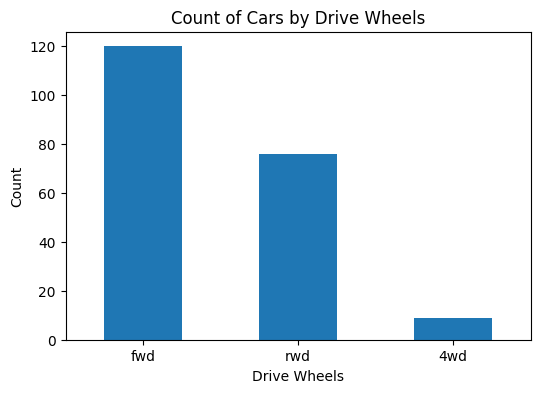

In [ ]:
drive_wheels_counts = df["drive-wheels"].value_counts()

plt.figure(figsize=(6, 4))
drive_wheels_counts.plot(kind='bar')
plt.xlabel("Drive Wheels")
plt.ylabel("Count")
plt.title("Count of Cars by Drive Wheels")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

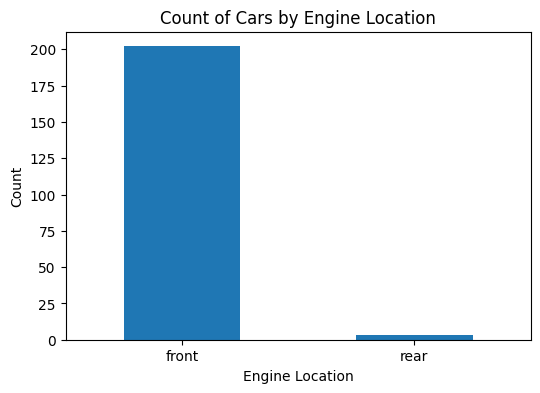

In [ ]:
engine_location_counts = df["engine-location"].value_counts()

plt.figure(figsize=(6, 4))
engine_location_counts.plot(kind='bar')
plt.xlabel("Engine Location")
plt.ylabel("Count")
plt.title("Count of Cars by Engine Location")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["wheel-base"].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheel-base, dtype: int64

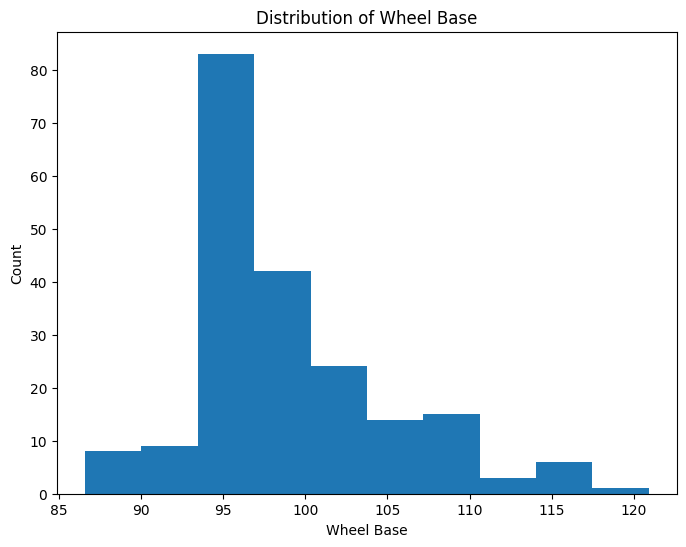

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["wheel-base"], bins=10)
plt.xlabel("Wheel Base")
plt.ylabel("Count")
plt.title("Distribution of Wheel Base")
plt.show()

The "wheel-base" column represents the wheelbase measurements of the cars. To visualize the count of each unique value in the "wheel-base" column, a bar plot may not be the most suitable option since the wheelbase values are continuous and can have a wide range of values. Instead, it would be more appropriate to use a histogram to visualize the distribution of wheelbase values.

In [ ]:
df["length"].value_counts()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: length, Length: 75, dtype: int64

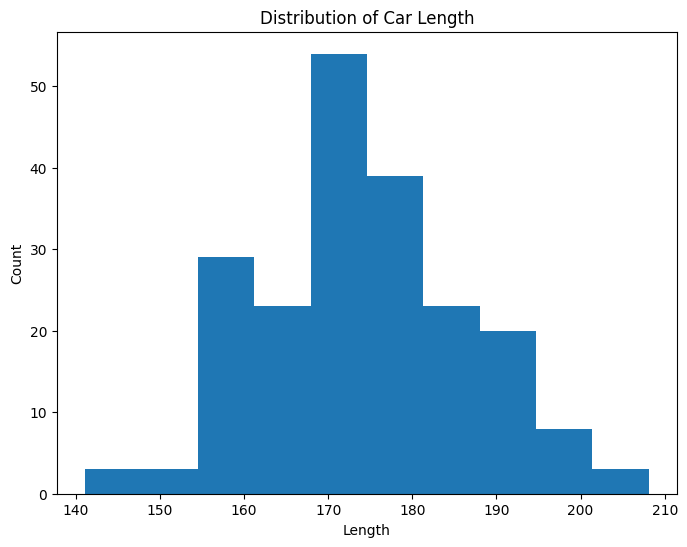

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["length"], bins=10)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Car Length")
plt.show()

In [ ]:
df["width"].value_counts()


63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: width, dtype: int64

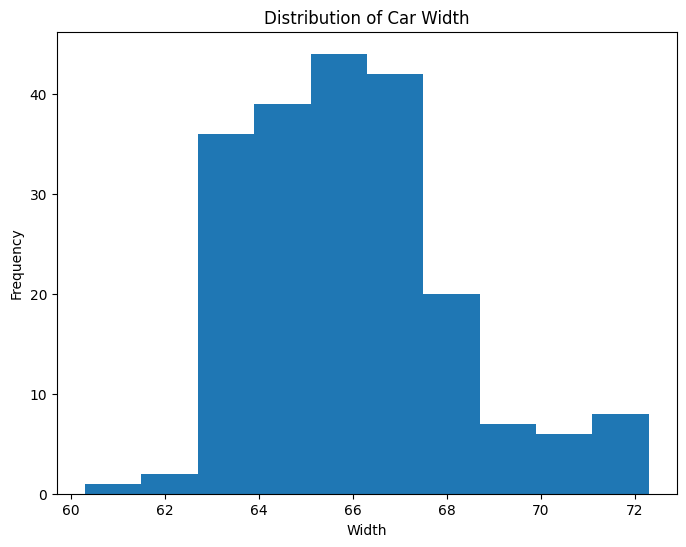

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["width"], bins=10)
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.title("Distribution of Car Width")
plt.show()

In [ ]:
df["height"].value_counts()

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: height, dtype: int64

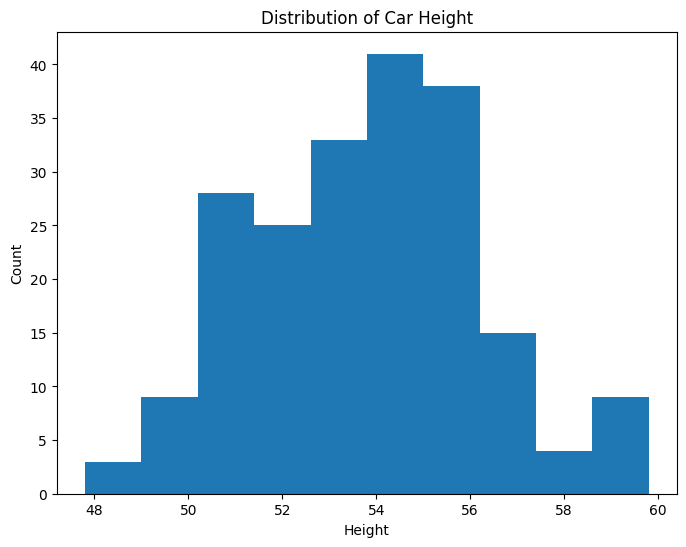

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["height"], bins=10)
plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Distribution of Car Height")
plt.show()

In [ ]:
df["curb-weight"].value_counts()

2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curb-weight, Length: 171, dtype: int64

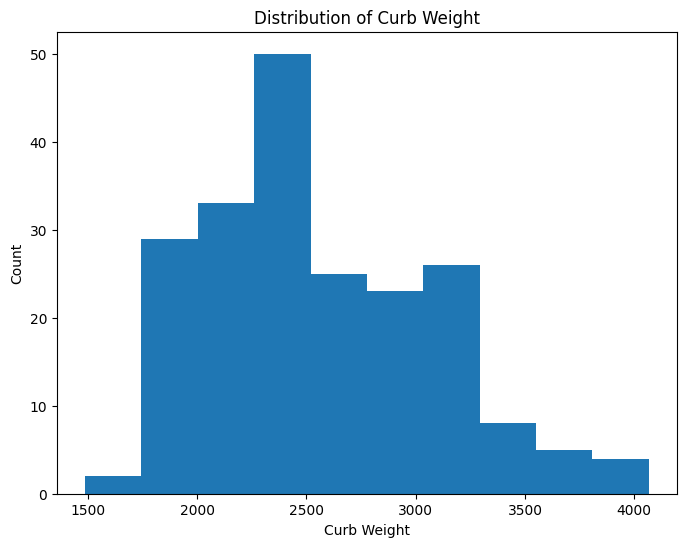

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["curb-weight"], bins=10)
plt.xlabel("Curb Weight")
plt.ylabel("Count")
plt.title("Distribution of Curb Weight")
plt.show()

In [ ]:
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

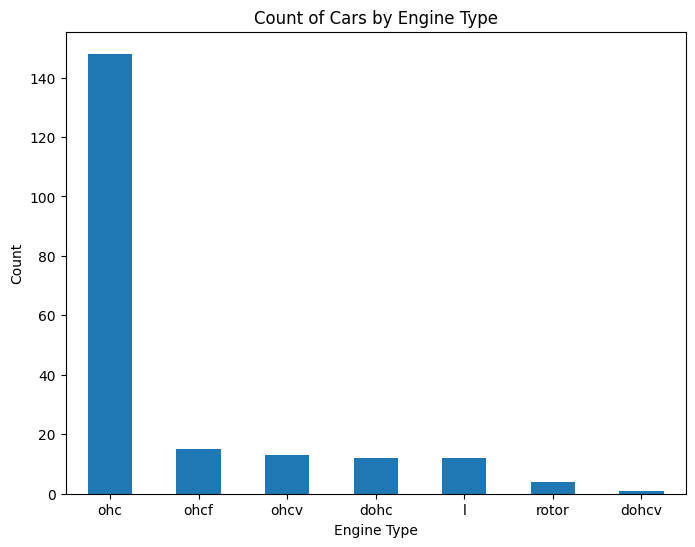

In [ ]:
engine_type_counts = df["engine-type"].value_counts()

plt.figure(figsize=(8, 6))
engine_type_counts.plot(kind='bar')
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.title("Count of Cars by Engine Type")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["num-of-cylinders"].value_counts()


four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

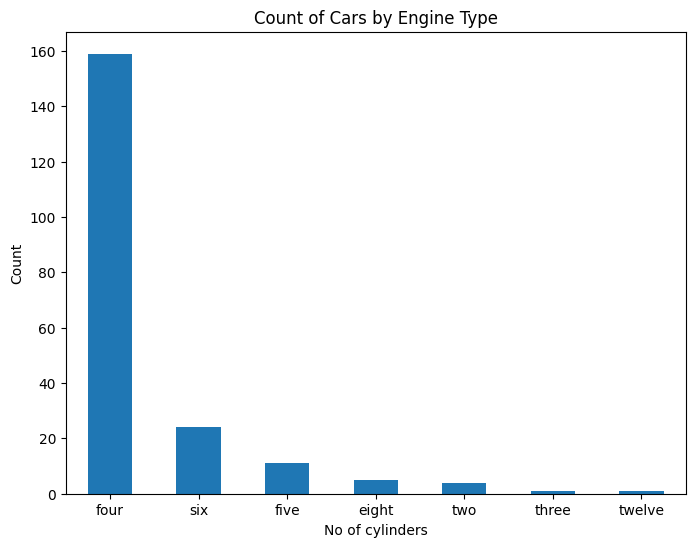

In [ ]:
engine_type_counts = df["num-of-cylinders"].value_counts()

plt.figure(figsize=(8, 6))
engine_type_counts.plot(kind='bar')
plt.xlabel("No of cylinders")
plt.ylabel("Count")
plt.title("Count of Cars by Engine Type")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["engine-size"].value_counts()

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: engine-size, dtype: int64

In [ ]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [ ]:
df["bore"].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.7      5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.8      2
3.63     2
3.5      2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.6      1
2.54     1
3.34     1
3.76     1
Name: bore, dtype: int64

In [ ]:
df["stroke"].value_counts()

3.4     20
3.03    14
3.23    14
3.15    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.07     6
3.58     6
3.5      6
3.27     6
3.41     6
3.11     6
3.19     6
3.52     5
3.64     5
3.47     4
3.86     4
3.54     4
3.9      3
2.9      3
3.08     2
2.19     2
2.68     2
3.1      2
4.17     2
2.8      2
3.12     1
3.21     1
2.07     1
2.36     1
3.16     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [ ]:
df["compression-ratio"].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compression-ratio, dtype: int64

In [ ]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
82      5
84      5
102     5
92      4
111     4
123     4
86      4
207     3
182     3
90      3
121     3
152     3
85      3
73      3
161     2
94      2
56      2
112     2
184     2
155     2
156     2
52      2
100     2
162     2
176     2
140     1
115     1
134     1
78      1
48      1
288     1
143     1
142     1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64

In [ ]:
df["peak-rpm"].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5800     7
5250     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [ ]:
df["city-mpg"].value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: city-mpg, dtype: int64

In [ ]:
df["highway-mpg"].value_counts()

25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highway-mpg, dtype: int64

In [ ]:
df["price"].value_counts()

8921     2
18150    2
8845     2
8495     2
7609     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 186, dtype: int64

In [ ]:
df["price"].isnull().sum()

4

As we checked above price column has 4 null values and this column is our target variable and we can not fill these values so we will drop these rows

In [ ]:
df.dropna(subset=['price'], inplace=True)

In [ ]:
df.shape

(201, 26)

In [ ]:
import matplotlib.pyplot as plt

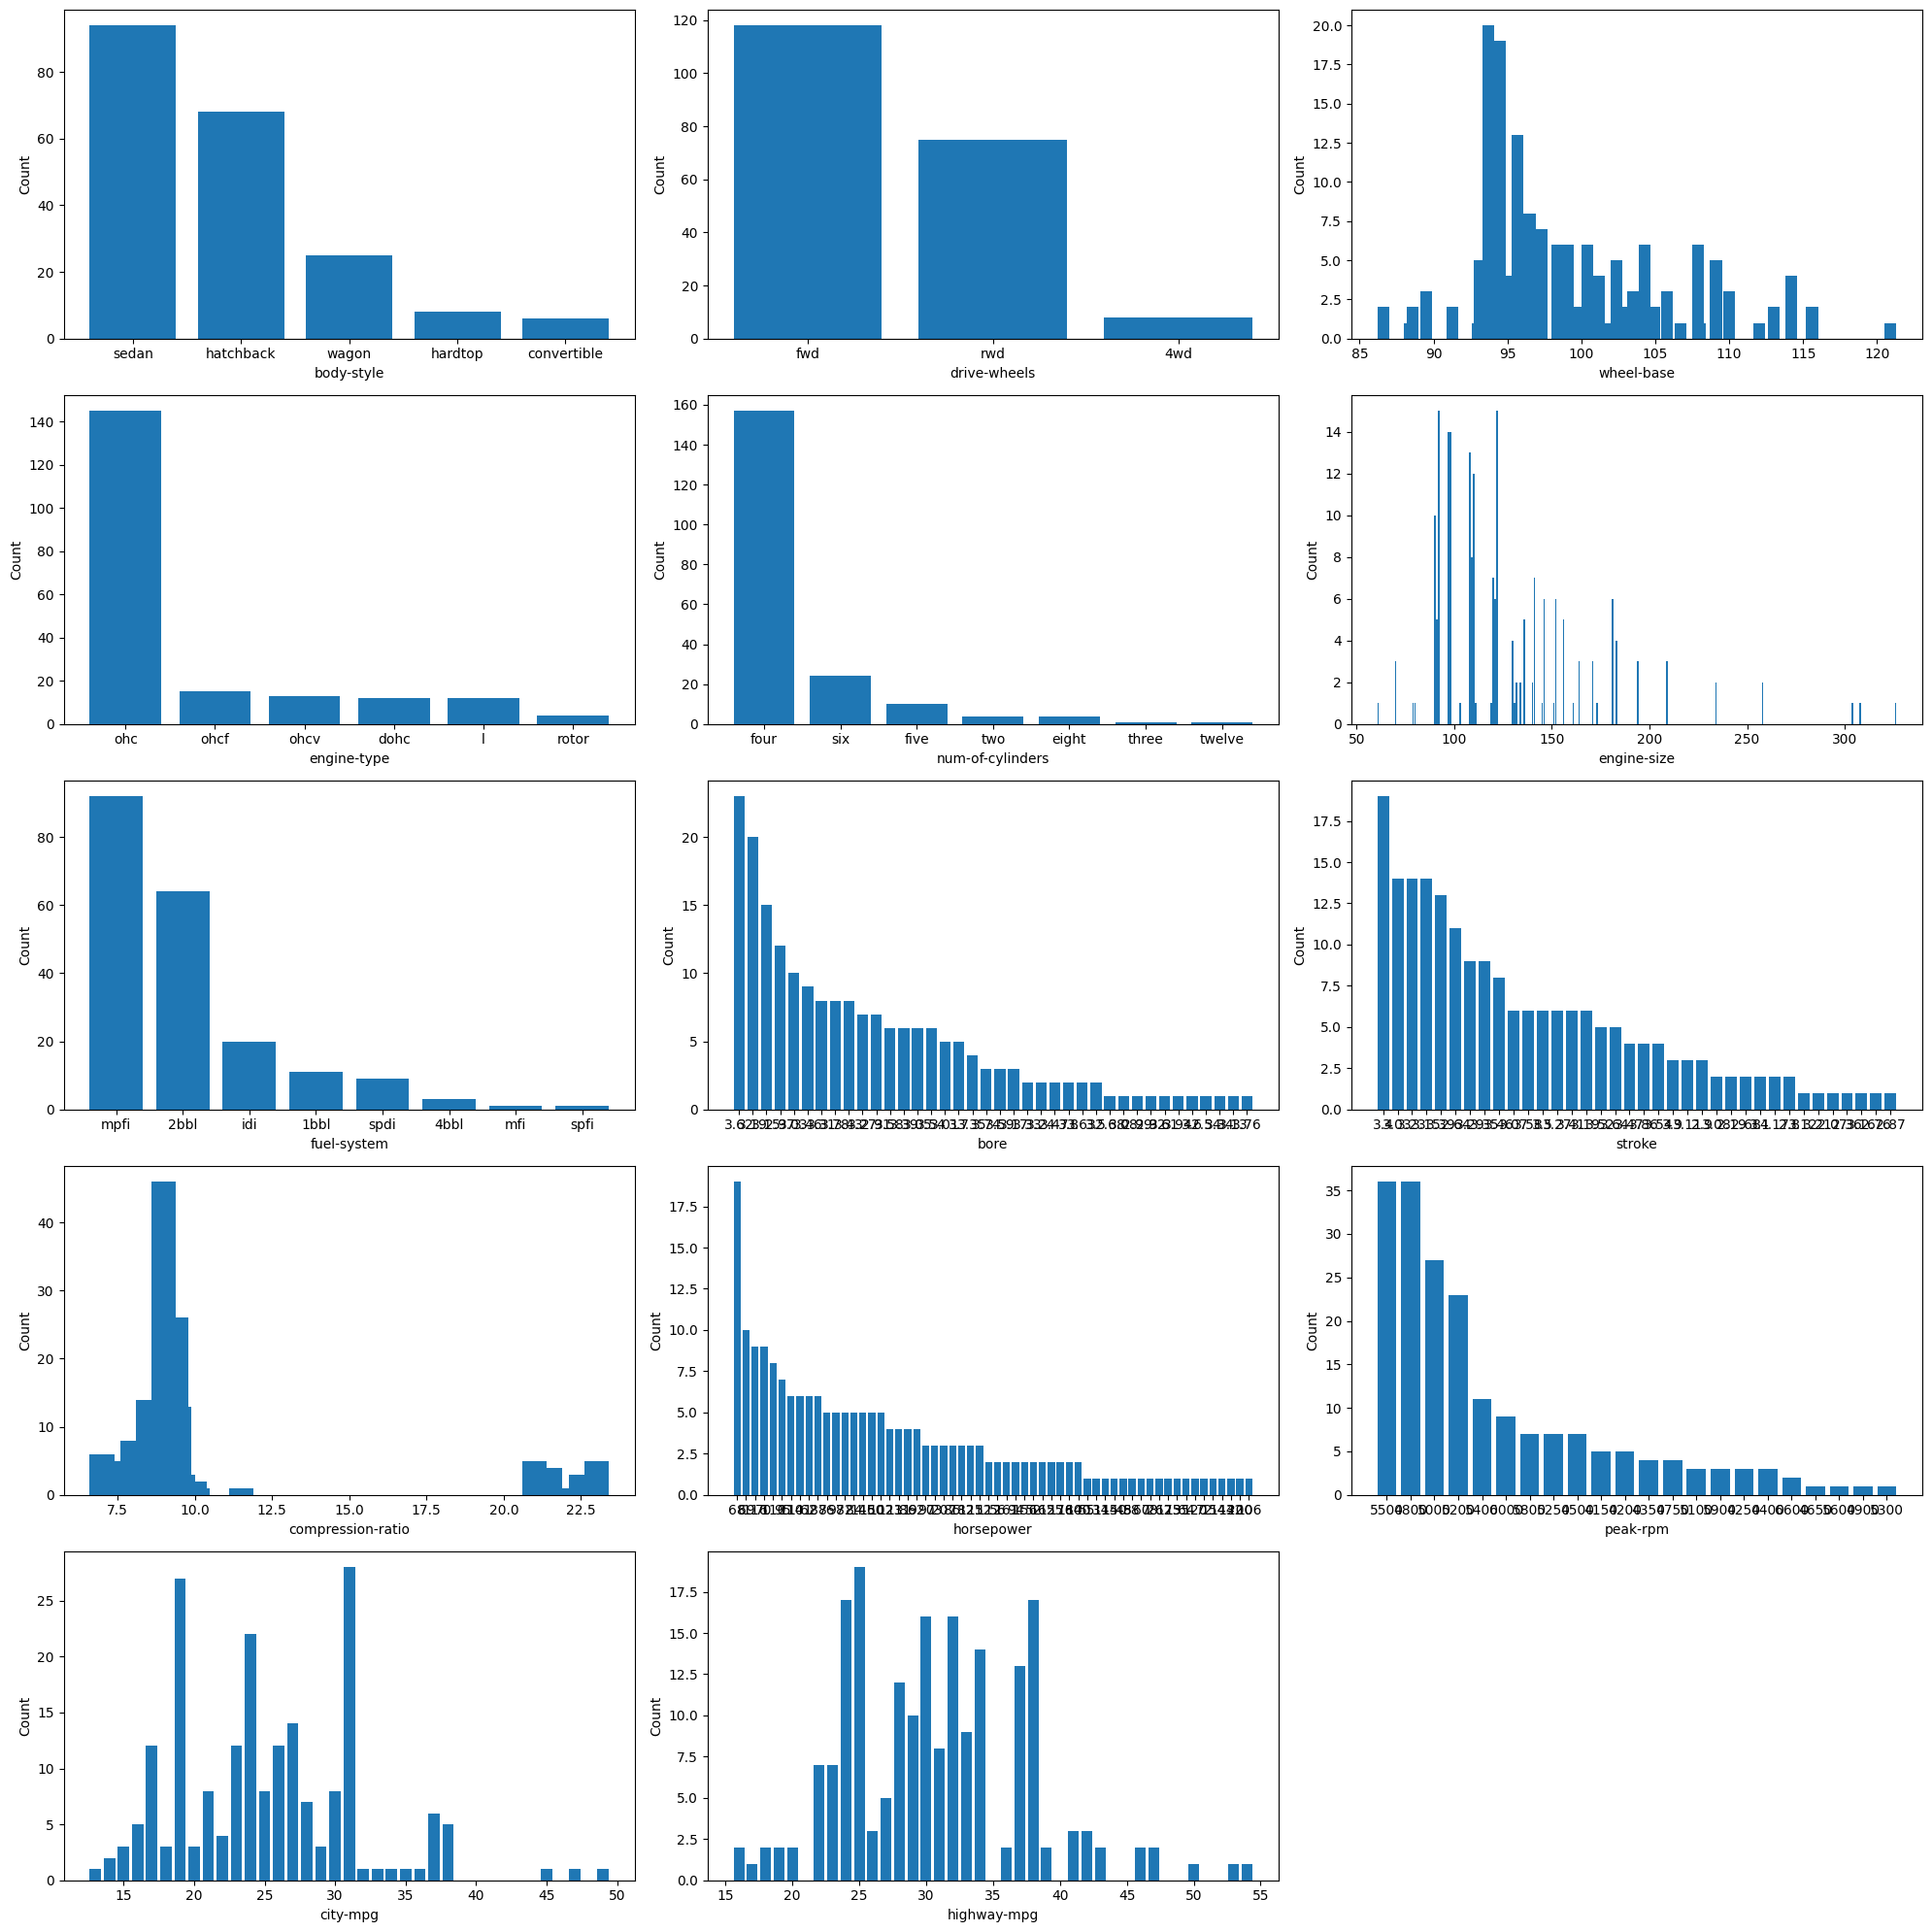

In [ ]:
attributes = ['body-style', 'drive-wheels', 'wheel-base', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
              'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, attr in enumerate(attributes):
    attr_counts = df[attr].value_counts()
    axes[i].bar(attr_counts.index, attr_counts.values)
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel("Count")

# Hide empty subplots
for j in range(len(attributes), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Due to the distinctiveness of all the features and the varying values within each feature, we will assign unique null values for each car individually.

---



In [ ]:
#check for the dtype of the columns
df["normalized-losses"].dtype
df["bore"].dtype
df["stroke"].dtype
df["horsepower"].dtype
df["peak-rpm"].dtype

dtype('O')

In [ ]:
#the datatype of these columns is object type . we need to convert this into float type to perform numerical operations
#To convert the columns into the float data type, we can use the astype()
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')

In [ ]:
#To fill the null values in the "normalized-losses" column where the make is "audi" with the mean value of the
#"normalized-losses" column for the "audi" make


audi_mean = df.loc[df['make'] == 'audi', 'normalized-losses'].mean()
df.loc[(df['make'] == 'audi') & (df['normalized-losses'].isnull()), 'normalized-losses'] = audi_mean

In [ ]:
#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

35

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "bmw" with the value 188
df.loc[(df['make'] == 'bmw') & (df['normalized-losses'].isnull()), 'normalized-losses'] = 188

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

31

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "jaguar" with the value 145

df.loc[(df['make'] == 'jaguar') & (df['normalized-losses'].isnull()), 'normalized-losses'] = 145

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

29

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "mercedes-benz" with the value 142

df.loc[(df['make'] == 'mercedes-benz') & (df['normalized-losses'].isnull()), 'normalized-losses'] = 142

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

26

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "mitsubishi" with the value 157(mean of that make)

df.loc[(df['make'] == 'mitsubishi') & (df['normalized-losses'].isnull()), 'normalized-losses'] = 157

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

23

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "peugot" with the value 161

df.loc[(df['make'] == 'peugot') & (df['normalized-losses'].isnull()), 'normalized-losses'] = 161

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

19

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "mercedes-benz" with the value 119

df.loc[(df['make'] == 'plymouth') & (df['normalized-losses'].isnull()), 'normalized-losses'] = 119

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

18

In [ ]:
#To fill the missing values in the "normalized-losses" column where the make is "renault" with the value 150

df.loc[(df['make'] == 'renault') & (df['normalized-losses'].isnull()), 'normalized-losses'] = 150

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

16

In [ ]:
#To fill the null values in the "normalized-losses" column where the make is "mazda" with the mean value of the
#"normalized-losses" column for the "mazda" make


mazda_mean = df.loc[df['make'] == 'mazda', 'normalized-losses'].mean()
df.loc[(df['make'] == 'mazda') & (df['normalized-losses'].isnull()), 'normalized-losses'] = mazda_mean

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

14

In [ ]:
#To fill the null values in the "normalized-losses" column where the make is "volkswagen" with the mean value of the
#"normalized-losses" column for the "volkswagen" make


volkswagen_mean = df.loc[df['make'] == 'volkswagen', 'normalized-losses'].mean()
df.loc[(df['make'] == 'volkswagen') & (df['normalized-losses'].isnull()), 'normalized-losses'] = volkswagen_mean

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

10

In [ ]:
#To fill the null values in the "normalized-losses" column where make is "toyota" with the mean of the "normalized-losses"
#column where body style is "wagon" and make is "toyota".

toyota_mean = df[(df["make"] == "toyota") & (df["body-style"] == "wagon")]["normalized-losses"].mean()

#replace the null values in the "normalized-losses" column where make is "toyota" with the calculated mean
df.loc[(df["make"] == "toyota") & (df["normalized-losses"].isnull()), "normalized-losses"] = toyota_mean

#check for remaining null values in the normalized-losses column
df["normalized-losses"].isnull().sum()

9

In [ ]:
#To fill the missing values in the "no of doors" column where the make is "mazda" with the value 4

df.loc[(df['make'] == 'mazda') & (df['num-of-doors'].isnull()), 'num-of-doors'] = "four"

#check for remaining null values in the normalized-losses column
df["num-of-doors"].isnull().sum()

1

In [ ]:
#To fill the missing values in the "no of doors" column where the make is "dodge" with the value 4

df.loc[(df['make'] == 'dodge') & (df['num-of-doors'].isnull()), 'num-of-doors'] = "four"

#check for remaining null values in the normalized-losses column
df["num-of-doors"].isnull().sum()

0

In [ ]:
#To fill the missing values in the "no of doors" column where the make is "dodge" with the value 4

df.loc[(df['make'] == 'dodge') & (df['num-of-doors'].isnull()), 'num-of-doors'] = "four"

#check for remaining null values in the normalized-losses column
df["num-of-doors"].isnull().sum()

0

In [ ]:
#To fill the missing values in the "peak-rpm" column where the make is "renault" with the value 5250

df.loc[(df['make'] == 'renault') & (df['peak-rpm'].isnull()), 'peak-rpm'] = 5250

#check for remaining null values in the normalized-losses column
df["peak-rpm"].isnull().sum()

0

In [ ]:
#To fill the null values in the "bore" column where make is "mazda" with the mean of the "bore" column where make
#is also "mazda"

mean_bore = df[df["make"] == "mazda"]["bore"].mean()

#replace the null values in the "bore" column where make is "mazda" with the calculated mean:
df.loc[(df["make"] == "mazda") & (df["bore"].isnull()), "bore"] = mean_bore

#check for remaining null values in the normalized-losses column
df["bore"].isnull().sum()

0

In [ ]:
#To fill the null values in the "stroke" column where make is "mazda" with the mean of the "stroke" column where make
#is also "mazda"

mean_bore = df[df["make"] == "mazda"]["stroke"].mean()

#replace the null values in the "bore" column where make is "mazda" with the calculated mean:
df.loc[(df["make"] == "mazda") & (df["stroke"].isnull()), "stroke"] = mean_bore

#check for remaining null values in the normalized-losses column
df["stroke"].isnull().sum()

0

Since we focus on predicting the price of the cars. Our target column, denoting Price, will be represented as y, while the remaining columns containing car characteristics will be represented as X.

In [ ]:
X = df.drop("price", axis = 1)
y = df["price"]

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X.corr()
correlation_matrix

<ipython-input-80-804e2588d906>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
symboling,1.000000,0.453911,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.145480,-0.003382,-0.182196,0.076038,0.279964,-0.035527,0.036233
normalized-losses,0.453911,1.000000,0.068589,0.156407,0.207716,-0.318737,0.230031,0.251406,0.058350,0.104599,-0.122452,0.342138,0.194518,-0.328522,-0.290685
wheel-base,-0.535987,0.068589,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494957,0.156392,0.250313,0.371621,-0.361327,-0.470606,-0.543304
length,-0.365404,0.156407,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610160,0.122761,0.159733,0.580309,-0.284815,-0.665192,-0.698142
width,-0.242423,0.207716,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.545030,0.188539,0.189867,0.615315,-0.244888,-0.633531,-0.680635
height,-0.550160,-0.318737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185839,-0.065370,0.259737,-0.087407,-0.310833,-0.049800,-0.104812
curb-weight,-0.233118,0.230031,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644784,0.166635,0.156433,0.758063,-0.279437,-0.749543,-0.794889
engine-size,-0.110581,0.251406,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.576641,0.202265,0.028889,0.822713,-0.256314,-0.650546,-0.679571
bore,-0.145480,0.058350,0.494957,0.610160,0.545030,0.185839,0.644784,0.576641,1.000000,-0.055794,0.001873,0.566831,-0.271849,-0.577683,-0.587552
stroke,-0.003382,0.104599,0.156392,0.122761,0.188539,-0.065370,0.166635,0.202265,-0.055794,1.000000,0.187309,0.100349,-0.053119,-0.037587,-0.037756


Text(0.5, 1.0, 'Correlation Matrix')

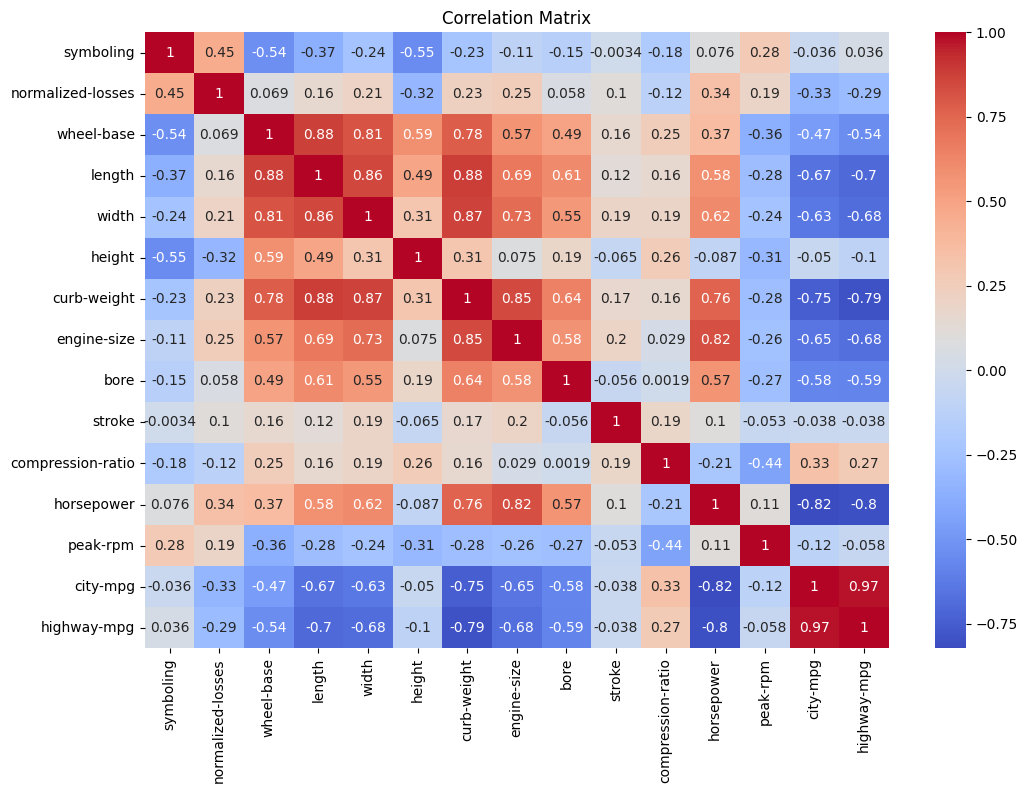

In [ ]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


To split the data into training and testing sets, we will utilize the train_test_split module. This module allows us to divide our dataset into two separate subsets: one for training our classification model and the other for evaluating its performance.
---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split data
#splitting training data into 80% and testing data into 20%, we will set the random_state parameter to 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#check for the shape of  X_train
X_train.shape

(160, 25)

In [ ]:
#check for the shape of  X_test
X_test.shape

(41, 25)

In [ ]:
#check for null values in X_train
X_train.isnull().sum()

symboling            0
normalized-losses    7
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

In [ ]:
#calculate median of "normalized-losses" column in X_train dataset
mean = X_train["normalized-losses"].mean()
mean

124.78877995642702

In [ ]:
#fill null vales in "normalized-losses" column with mean
X_train["normalized-losses"] = X_train["normalized-losses"].fillna(mean)

In [ ]:
X_train["normalized-losses"].isnull().sum()

0

In [ ]:
#check for null values in X_test
X_test.isnull().sum()

symboling            0
normalized-losses    2
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

In [ ]:
#calculate mean of "normalized-losses" column in X_test dataset
mean_test = X_test["normalized-losses"].mean()
mean_test

129.62008547008548

In [ ]:
#fill null vales in "normalized-losses" column with mean
X_test["normalized-losses"] = X_test["normalized-losses"].fillna(mean_test)

In [ ]:
# check for null values in "normalized-lossess" column after filling  null values
X_test["normalized-losses"].isnull().sum()

0

In [ ]:
# List of unnecessary columns
unnecessary_columns = ["symboling", "length", "width", "height", "highway-mpg","num-of-doors"]

# Drop the unnecessary columns
X_train.drop(unnecessary_columns, axis=1, inplace=True)
X_test.drop(unnecessary_columns, axis=1, inplace=True)

The following columns were dropped because These columns were considered less relevant or not directly related to determining the price of a car, They may not have a direct impact on the pricing decision or are redundant with other features.By removing them, we focus on the most important features that influence car prices.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(160, 19)
(41, 19)


In [ ]:
# Select columns with object data types
object_columns = df.select_dtypes(include=['object'])

object_columns

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,16845
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,19045
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,22470


We will use a technique called One-Hot Encoding for certain columns in our dataset. These columns have categories that are not related in any specific order. One-Hot Encoding will convert these categories into separate columns with 1s and 0s, indicating the presence or absence of each category. This helps our regression model to understand and use the categorical information properly without assuming any numerical order.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_columns=['make', 'fuel-type',"aspiration","body-style","drive-wheels","engine-location","engine-type","fuel-system"]

# Initialize the OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training data
train_encoded = ohe.fit_transform(X_train[cat_columns])

# Transform the testing data using the fitted encoder
test_encoded = ohe.transform(X_test[cat_columns])

# Get the feature names
feature_names = ohe.get_feature_names_out(cat_columns)

# Create DataFrames for the encoded data
train_encoded_df = pd.DataFrame(train_encoded.toarray(), columns=feature_names)
test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=feature_names)

In [ ]:
# Display the encoded training set
print("Encoded Training Set:")
train_encoded_df

Encoded Training Set:


,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
156,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Display the encoded testing set
print("\nEncoded Testing Set:")
test_encoded_df.head()


Encoded Testing Set:


,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Reset the index of the original data
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Reset the index of the encoded data
train_encoded_df.reset_index(drop=True, inplace=True)
test_encoded_df.reset_index(drop=True, inplace=True)

In [ ]:
# Concatenate the encoded data with the original data
X_train = pd.concat([X_train.drop(cat_columns, axis=1), train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(cat_columns, axis=1), test_encoded_df], axis=1)

In [ ]:
# Display the encoded and concatenated training set
print("Encoded and Concatenated Training Set:")
X_train

Encoded and Concatenated Training Set:


,normalized-losses,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,95.0,109.1,3012,six,173,3.58,2.87,8.8,134.0,5500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,85.0,96.5,2304,four,110,3.15,3.58,9.0,86.0,5800.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,148.0,93.7,1989,four,90,2.97,3.23,9.4,68.0,5500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,186.0,94.5,2778,four,151,3.94,3.11,9.5,143.0,5500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,95.0,109.1,2952,four,141,3.78,3.15,9.5,114.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,161.0,114.2,3230,four,120,3.46,3.19,8.4,97.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
156,188.0,103.5,3230,six,209,3.62,3.39,8.0,182.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,128.0,94.5,2028,four,97,3.15,3.29,9.4,69.0,5200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
158,122.0,97.3,2209,four,109,3.19,3.40,9.0,85.0,5250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Display the encoded and concatenated testing set
#for number of cylinders column, we can simply convert categorical value of numbers into numerical value.
print("\nEncoded and Concatenated Testing Set:")
X_test.head()


Encoded and Concatenated Testing Set:


,normalized-losses,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,168.0,95.1,2008,four,97,3.15,3.29,9.40,69.0,5200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,188.0,103.5,3380,six,209,3.62,3.39,8.00,182.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,137.0,86.6,1819,four,92,2.91,3.41,9.20,76.0,6000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91.0,95.7,2140,four,98,3.19,3.03,9.00,70.0,4800.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150.0,99.1,2658,four,121,3.54,3.07,9.31,110.0,5250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Define the mapping for label encoding
cylinder_mapping = {"four": 4, "six": 6, "eight": 8, "two": 2, "five": 5, "three": 3, "twelve": 12}

#train data

# Label encode the "num-of-cylinders" column on train data
X_train["num-of-cylinders"] = X_train["num-of-cylinders"].replace(cylinder_mapping)

#test data

# Label encode the "num-of-cylinders" column on test data
X_test["num-of-cylinders"] = X_test["num-of-cylinders"].replace(cylinder_mapping)
X_train

,normalized-losses,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,95.0,109.1,3012,6,173,3.58,2.87,8.8,134.0,5500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,85.0,96.5,2304,4,110,3.15,3.58,9.0,86.0,5800.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,148.0,93.7,1989,4,90,2.97,3.23,9.4,68.0,5500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,186.0,94.5,2778,4,151,3.94,3.11,9.5,143.0,5500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,95.0,109.1,2952,4,141,3.78,3.15,9.5,114.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,161.0,114.2,3230,4,120,3.46,3.19,8.4,97.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
156,188.0,103.5,3230,6,209,3.62,3.39,8.0,182.0,5400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,128.0,94.5,2028,4,97,3.15,3.29,9.4,69.0,5200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
158,122.0,97.3,2209,4,109,3.19,3.40,9.0,85.0,5250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#now, that all the features are encoded we can now apply scaling technique

print(X_train.shape)
print(X_test.shape)

(160, 61)
(41, 61)


In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

To visualize whether scaling is necessary for the numerical features, we can create box plots of the features before and after scaling. This will help us assess the range and distribution of the values

In [ ]:
#initialize StandardScaler
SS = StandardScaler()

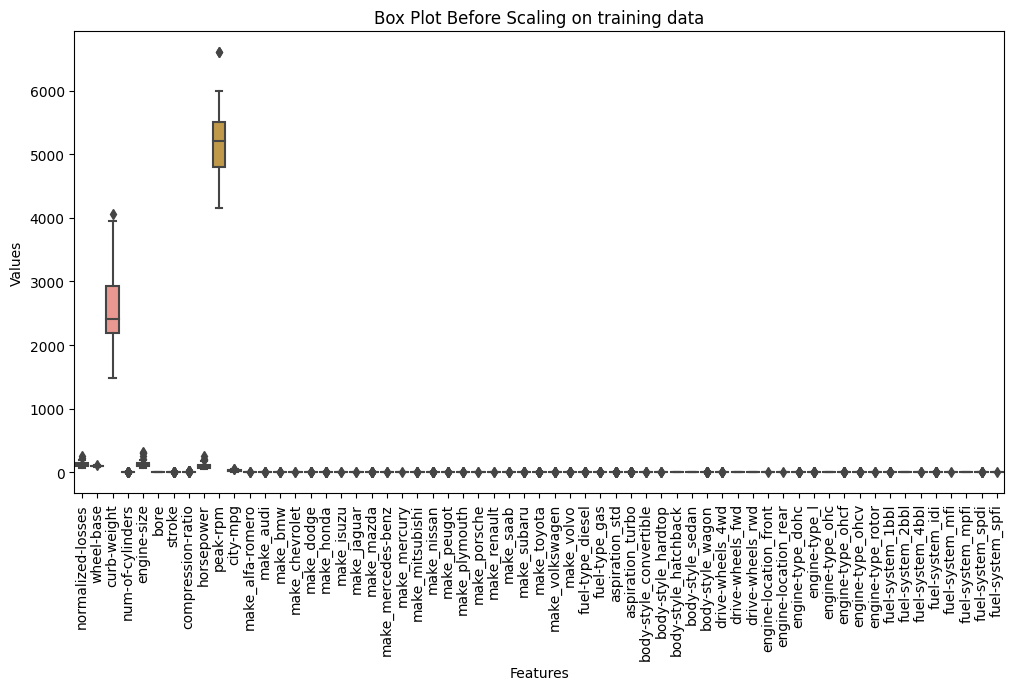

In [ ]:
# Plot box plot before scaling on training data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot Before Scaling on training data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
# fit StandardScaler to train data
X_train = SS.fit_transform(X_train)

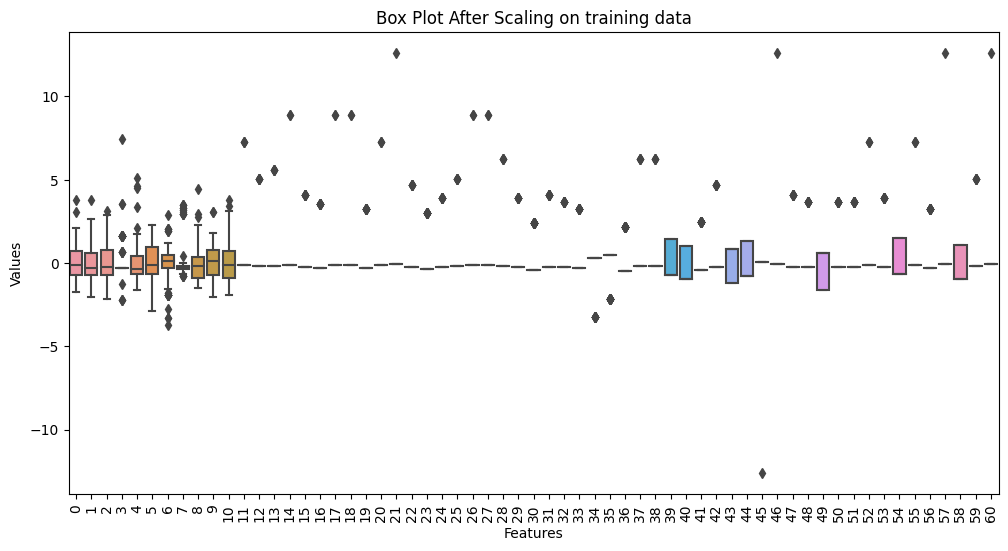

In [ ]:
# Plot box plot after scaling on training data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot After Scaling on training data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

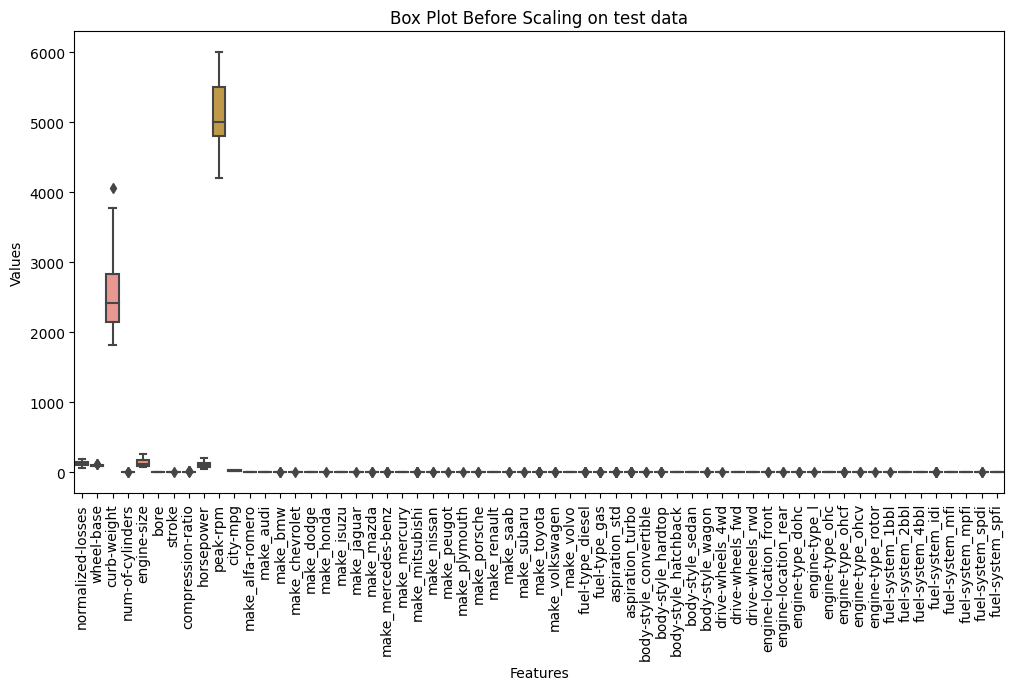

In [ ]:
# Plot box plot before scaling on test data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot Before Scaling on test data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

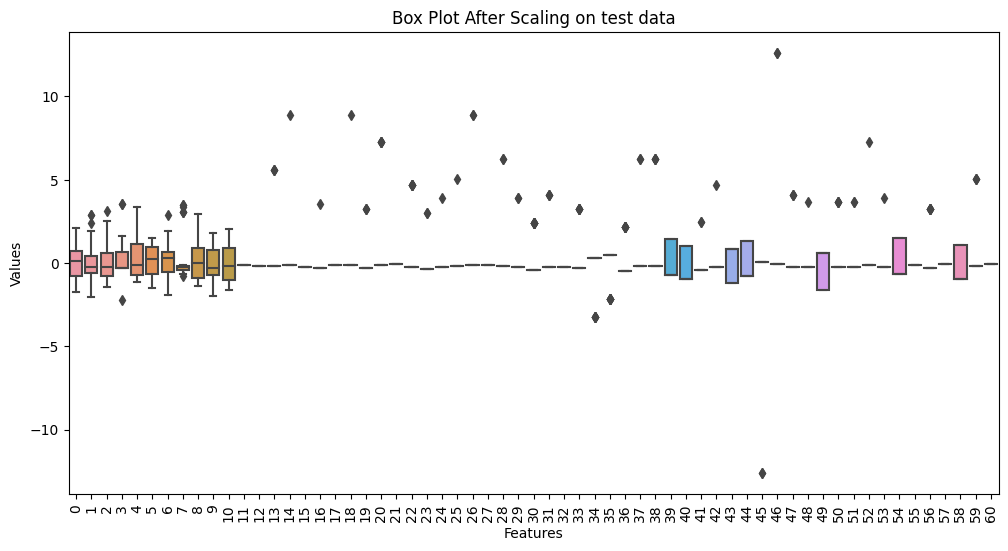

In [ ]:
#using StandardScaler to test data
X_test = SS.transform(X_test)

# Plot box plot After scaling on test data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot After Scaling on test data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
X_test.shape

(41, 61)

Now we will do feature extraction for feature extaction we will apply Principal component analysis (PCA) here. PCA is an unsupervised linear transformation technique which is primarily used for feature extraction and dimensionality reduction.Since we have 61 features, feature reduction is very important

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# while i was using pca it was showing an error it was saying that there is an Nan value in X_train so to fill the Nan value i have used simmpleimputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [ ]:
# Create a PCA object
pca = PCA()

In [ ]:
# Apply PCA transformation on the training data
X_train = pca.fit_transform(X_train)


# Apply PCA transformation on the test data
X_test = pca.transform(X_test)

In [ ]:
# Print the explained variance ratio
print("Explained variance ratio : \n", pca.explained_variance_ratio_)

# Print the shape of the transformed train and test data
print("Shape of X_train_pca : \n", X_train.shape)
print("Shape of X_test_pca : \n", X_test.shape)

Explained variance ratio : 
 [1.36098858e-01 9.29922173e-02 6.05655755e-02 5.08200809e-02
 4.89511052e-02 4.54486082e-02 3.81330628e-02 3.54219531e-02
 3.43837184e-02 3.25901591e-02 3.14398475e-02 2.73540543e-02
 2.50820935e-02 2.42237768e-02 2.34811714e-02 2.15868604e-02
 2.05779472e-02 1.96302355e-02 1.85990839e-02 1.77620337e-02
 1.74136814e-02 1.69194086e-02 1.64295934e-02 1.53708151e-02
 1.37606416e-02 1.34040168e-02 1.11701030e-02 1.05130994e-02
 1.03979353e-02 9.28637010e-03 8.73685697e-03 7.63446545e-03
 6.45454497e-03 6.21022244e-03 5.15787693e-03 4.91640659e-03
 3.65375544e-03 3.44485809e-03 2.89102291e-03 2.34351412e-03
 1.87825839e-03 1.73110241e-03 1.48075809e-03 1.15912792e-03
 8.34403799e-04 6.25936520e-04 4.31725621e-04 3.27625432e-04
 2.05996032e-04 7.34342679e-05 2.68407671e-32 1.94926080e-33
 1.38103143e-33 5.59372761e-34 5.59372761e-34 5.59372761e-34
 5.59372761e-34 5.59372761e-34 5.59372761e-34 5.59372761e-34
 3.29737581e-34]
Shape of X_train_pca : 
 (160, 61)
Shap

In [ ]:
#X_train
print("X_train data : \n",X_train)

#X_test
print("X_test data :\n ",X_test)

X_train data : 
 [[ 4.13633790e+00 -2.03798150e+00 -2.10529552e-01 ... -1.25230735e-16
  -8.42115434e-17 -8.26330190e-17]
 [-2.63752467e+00 -2.04373608e-01 -1.69026781e+00 ... -2.73738396e-16
  -1.26796973e-16 -1.80576695e-16]
 [-3.18965626e+00  6.88235176e-02 -4.62582803e-01 ... -1.28778341e-16
   4.51442817e-17 -2.20071064e-16]
 ...
 [-3.03670343e+00 -1.59922180e-01 -2.80444059e-01 ... -2.49241486e-17
  -8.74267198e-17  1.37884559e-17]
 [-1.27829683e+00 -1.24781580e-01 -8.90154676e-01 ...  9.52938208e-17
  -7.91877479e-17 -9.51120132e-17]
 [ 4.12445388e+00 -2.15879310e+00 -1.57022973e+00 ... -7.93941881e-17
   1.04940829e-16  1.69349643e-16]]
X_test data :
  [[-2.13740402e+00 -6.36052180e-01  1.63895127e-01 ...  3.43955984e-17
  -4.71198320e-16  2.82221541e-16]
 [ 4.13508330e+00 -2.17829141e+00 -1.84882715e+00 ... -1.30741301e-15
  -5.63931785e-16 -5.29629045e-16]
 [-4.23712693e+00 -6.30737517e-01 -1.75920453e+00 ...  1.17662325e-16
  -1.52009201e-16  4.20999419e-16]
 ...
 [ 1.673264

PCA is applied separately on the scaled train and test data using the fit_transform and transform methods. The explained_variance_ratio_ attribute is printed to see the amount of variance explained by each principal component.

Finally, the shape of the transformed train and test data is printed to verify the dimensionality reduction achieved through PCA.

Now that we have completed three important steps in data preprocessing, which include dropping columns, scaling the features using StandardScaler, and performing feature extraction using PCA, our data is now ready to be used for model fitting. These preprocessing steps have prepared the data by removing unnecessary columns, standardizing the feature scales, and reducing the dimensionality through PCA, enabling us to proceed with training our model on this refined and transformed dataset.

1.**LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create and fit the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regression.predict(X_test)

# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)

Mean Squared Error (MSE): 2.860702125946791e+29
Mean Absolute Error (MAE): 83530367284536.08
R2-score: -2.3381917265716249e+21


**2. Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create and fit the Decision Tree Regression model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)


# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)

Mean Squared Error (MSE): 12053029.853658536
Mean Absolute Error (MAE): 2393.951219512195
R2-score: 0.9014846934662313


**3. Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create and fit the Random Forest Regression model
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)

Mean Squared Error (MSE): 22642159.54762361
Mean Absolute Error (MAE): 2848.6845528455283
R2-score: 0.8149345587372316


**Support Vector Regression**

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Create and fit the Support Vector Regression model
svr = SVR()
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)

Mean Squared Error (MSE): 149241077.23480782
Mean Absolute Error (MAE): 7947.507431185496
R2-score: -0.2198202982758053


**Model Evaluation**

Based on the evaluation metrics , here is the interpretation for each model:

*Linear Regression:*

Mean Squared Error (MSE): 2.860702125946791e+29

Mean Absolute Error (MAE): 83530367284536.08

R2-score: -2.3381917265716249e+21

The Linear Regression model performs poorly, with extremely high MSE and MAE values. The negative R2-score indicates that the model performs worse than simply using the mean of the target variable for predictions. It fails to capture the relationship between the features and the car prices effectively.

*Decision Tree:*

Mean Squared Error (MSE): 12053029.853658536

Mean Absolute Error (MAE): 2393.951219512195

R2-score: 0.9014846934662313

The Decision Tree Regression model shows significantly improved performance compared to Linear Regression. It exhibits relatively low MSE and MAE values, indicating better accuracy in predicting car prices. The high R2-score suggests that the model explains a substantial portion of the variance in the data and fits the car price prediction task quite well.

*Random Forest:*

Mean Squared Error (MSE): 22642159.54762361

Mean Absolute Error (MAE): 2848.6845528455283

R2-score: 0.8149345587372316

The Random Forest Regression model performs well, with relatively low MSE and MAE values. It outperforms the Linear Regression model, demonstrating better accuracy in predicting car prices. The R2-score of 0.835 indicates a good fit to the data, explaining a significant portion of the variance in the car prices.

*Support Vector Machine (SVM):*

Mean Squared Error (MSE): 149241077.23480782

Mean Absolute Error (MAE): 7947.507431185496

R2-score: -0.2198202982758053

The SVR model performs poorly compared to the other models. It exhibits high MSE and MAE values, indicating lower accuracy in predicting car prices. The negative R2-score suggests that the model does not fit the data well and fails to capture the underlying relationship between the features and car prices.

Overall, based on the evaluation metrics, the Decision Tree Regression model performs the best among the four models. It demonstrates relatively low MSE and MAE values, indicating better accuracy and precision in predicting car prices. Additionally, it has a high R2-score, suggesting a good fit to the data and a significant explanation of the variance in the car prices.

The Random Forest Regression model also performs well, providing competitive accuracy and model fit. However, it slightly lags behind the Decision Tree Regression model in terms of the evaluation metrics.

On the other hand, the Linear Regression model performs poorly, while the SVR model shows the weakest performance among the four models.

Therefore, based on this model evaluation, the Decision Tree Regression model appears to be the most suitable choice for the car price prediction task, providing accurate and reliable predictions.

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

Hyperparameter tuning is the process of finding the optimal values for the hyperparameters of a machine learning algorithm. Hyperparameters are configuration parameters that are set before the learning process begins and are not learned from the data. They control the behavior of the learning algorithm and can have a significant impact on the performance of the model.

The goal of hyperparameter tuning is to find the combination of hyperparameter values that results in the best performance of the model on unseen data. It helps to improve the model's accuracy, generalization, and robustness.

There are several methods for hyperparameter tuning, including:

Grid Search CV

Random Search CV

Bayesian Optimization

Genetic Algorithms

In [ ]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree Regression model
decision_tree = DecisionTreeRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE): 15993862.4344407
Mean Absolute Error (MAE): 2718.5814796136683
R2-score: 0.8692743418444625


**Final Model**

In [ ]:
# Create and fit the Decision Tree Regression model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)


# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)

Mean Squared Error (MSE): 23133746.243902437
Mean Absolute Error (MAE): 3000.878048780488
R2-score: 0.8109165802986291


**Feature Importance**

In [ ]:
#check the feature importances using a Decision Tree model and visualize them
# Get the feature importances from the trained model
importances = decision_tree.feature_importances_
importances

array([8.20511954e-01, 9.11911262e-04, 2.06253929e-07, 1.01456136e-05,
       1.48966820e-03, 6.15731965e-03, 1.34230456e-04, 0.00000000e+00,
       0.00000000e+00, 6.24644303e-04, 7.87755935e-03, 3.33837459e-03,
       0.00000000e+00, 6.44700648e-06, 1.64505856e-04, 2.33640561e-03,
       3.84397905e-06, 1.73706488e-05, 6.34232580e-05, 4.65649658e-05,
       0.00000000e+00, 6.03974393e-03, 7.45418190e-03, 8.50414593e-03,
       3.38973268e-03, 2.55280775e-03, 1.47571297e-03, 6.24438662e-04,
       1.15483478e-02, 3.13860158e-05, 3.00254505e-04, 4.52771795e-02,
       4.67357920e-05, 1.05742751e-02, 1.95926378e-05, 4.90801519e-03,
       3.56614473e-02, 5.76596858e-06, 8.91222658e-05, 2.65216854e-04,
       5.65168219e-06, 8.71579971e-06, 1.85130675e-03, 1.71052296e-03,
       9.95615864e-04, 0.00000000e+00, 9.33822082e-03, 6.14681892e-04,
       1.20542223e-03, 1.80718450e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

**Conclusion**

In conclusion, this project focused on Predicting the price of cars based on various features. The objective was to build a machine learning model that could accurately predict the Price of a car given its features.

Started exploring the dataset and understanding the distribution and the characteristics of the features. Data preprocessing techniques were applied, including handling missing values, encoding categorical variables, and scaling numerical features.

Several regression algorithms, including Linear Regression, Random Forest, SVR,and decision tree , were trained and evaluated using performance metrics such as MSE, MAE and R2-score. The models were tuned and optimized to achieve the best possible performance.

After comparing the results, it was determined that the Decision Tree algorithm outperformed the other models in terms of R2 score. It exhibited the highest accuracy in cPredicting Price of a car based on the given features.

The project also involved feature importance analysis using techniques such as Decision Tree's feature importances. This analysis provided insights into the significance of each feature in predicting car classes.